In [11]:
from openbb_terminal.stocks.options import (
    alphaquery_view,
    barchart_view,
    calculator_view,
    chartexchange_view,
    fdscanner_view,
    intrinio_model,
    intrinio_view,
    nasdaq_model,
    tradier_model,
    tradier_view,
    yfinance_model,
    yfinance_view,
)
import talib
import pytz
import pandas as pd
from openbb_terminal import OpenBBFigure, theme
import matplotlib.pyplot as plt
from openbb_terminal.helper_funcs import get_user_timezone
from openbb_terminal.stocks.options import alphaquery_model
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
from openbb_terminal.stocks.options.yfinance_model import (
    generate_data,
    get_option_chain,
    get_price,
)
from pathlib import Path
from openbb_terminal.stocks import cboe_view, stocks_helper, stocks_view
from openbb_terminal.stocks.options import op_helpers, yfinance_model
from typing import Any, Dict, List, Optional, Union
from openbb_terminal.core.plots.plotly_ta.ta_class import PlotlyTA
from openbb_terminal.reports import widget_helpers as widgets
from collections import defaultdict
from matplotlib import pyplot as plt
import yfinance as yf
import numpy as np
from scipy.stats import norm
import talib
from tabulate import tabulate
import base64
from google.cloud import storage
import os
from collections import defaultdict 

In [84]:
symbol = "SPY"
start_date = datetime.strftime(
    datetime.now() + relativedelta(months=-12*5), "%Y-%m-%d"
)
timeperiod = 16
interval = 1440 # 1 day
stock_spy = stocks_helper.load(symbol, interval=interval, start_date=start_date)

Loading Daily data for SPY with starting period 2019-01-02.

In [85]:
symbol = "TLT"
start_date = datetime.strftime(
    datetime.now() + relativedelta(months=-12*5), "%Y-%m-%d"
)
interval = 1440 # 1 day
stock_tlt = stocks_helper.load(symbol, interval=interval, start_date=start_date)

Loading Daily data for TLT with starting period 2019-01-02.

In [86]:
def zscore_values(series):
    return (series - series.mean()) / np.std(series)

In [111]:
stock_spy['sma'] = talib.RSI(stock_spy["Close"], timeperiod=timeperiod)[timeperiod:]
stock_tlt['sma'] = talib.RSI(stock_tlt["Close"], timeperiod=timeperiod)[timeperiod:]

In [117]:
zscore = zscore_values(stock_spy.sma/stock_tlt.sma)

In [118]:
zscore['sma'] = talib.SMA(zscore, timeperiod=4)[4:]

In [119]:
zscore['sma']

date
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-14         NaN
                ...   
2023-12-22   -0.454654
2023-12-26   -0.496320
2023-12-27   -0.420807
2023-12-28   -0.372727
2023-12-29   -0.337213
Length: 1254, dtype: float64

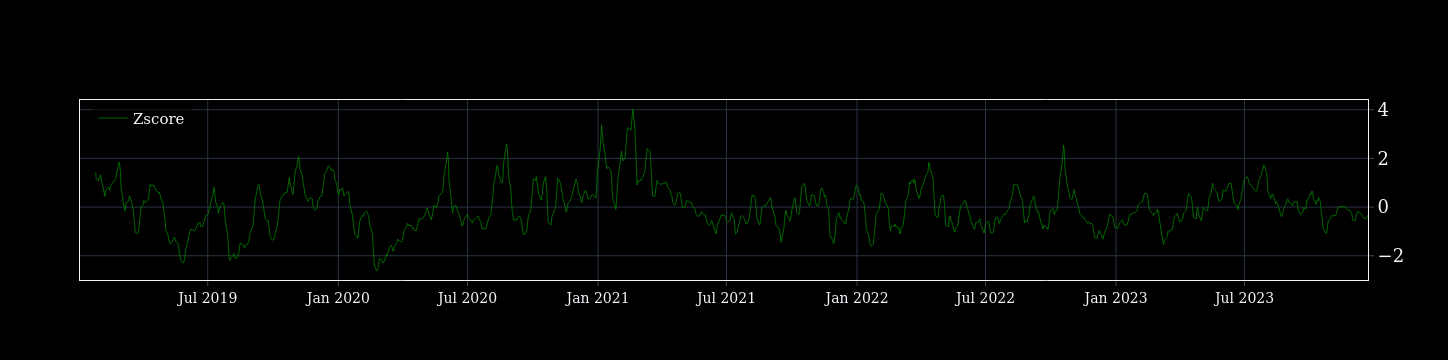

In [120]:
option_plot = OpenBBFigure.create_subplots()

option_plot.add_scatter(
    x=zscore.index,
    y=zscore['sma'],
    name=f"Zscore",
    orientation="h",
    showlegend=True,
    secondary_y=False,
    line=dict(color="green", width=0.8),
)